In [2]:
import numpy as np
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.grid_search import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
train_data=np.loadtxt("全体FURUKAWA_最後_名前なし.csv",delimiter=",",dtype=float)
train_feature=train_data[:,0:30]
train_label=train_data[:,-1]

test_data=np.loadtxt("全体WANG_最後_名前なし.csv",delimiter=",",dtype=float)
test_feature=test_data[:,0:30]
test_label=test_data[:,-1]

std = StandardScaler()
std.fit(train_feature)
train_feature = std.transform(train_feature)
test_feature = std.transform(test_feature)
tuned_parameters = [
    {'C': [2**(-3), 2**(-2), 2**(-1), 1, 2, 2**2, 2**3, 2**4, 2**5, 2**6, 2**7, 2**8, 2**9, 2**10], 'kernel': ['linear']},
    {'C': [2**(-3), 2**(-2), 2**(-1), 1, 2, 2**2, 2**3, 2**4, 2**5, 2**6, 2**7, 2**8, 2**9, 2**10], 'kernel': ['rbf'], 'gamma': [2**(-10), 2**(-9), 2**(-8), 2**(-7), 2**(-6), 2**(-5), 2**(-4), 2**(-3), 2**(-2), 2**(-1), 1 ]},
    ]
grid=GridSearchCV(SVR(),tuned_parameters,cv=5,scoring="r2")
grid.fit(train_feature,train_label)
print(grid.best_params_)
reg=SVR(C=grid.best_params_['C'],kernel="rbf",gamma=grid.best_params_['gamma'])
reg.fit(train_feature,train_label)
pred = reg.predict(test_feature)
r = r_calc(test_label,pred)
r2 = r2_score(test_label,pred)
rmse = (mean_squared_error(test_label,pred))**0.5

/Users/yamadayuuta/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/yamadayuuta/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


KeyboardInterrupt: 

In [2]:
def r_calc(test,pred):
    n=len(test)
    ave_test = np.sum(test)/n
    ave_pred = np.sum(pred)/n
    a=0
    b=0
    c=0
    for i in range(0,len(test)):
        a += (test[i] - ave_test)*(pred[i] - ave_pred)
        b += (test[i] - ave_test)**2
        c += (pred[i] - ave_pred)**2
    
    a2 = a/n
    b2 = (b/n)**0.5
    c2 = (c/n)**0.5
    return a2/(b2*c2)

In [12]:

reg=SVR(C=grid.best_params_['C'],kernel="rbf",gamma=grid.best_params_['gamma'])
reg.fit(train_feature,train_label)
pred = reg.predict(test_feature)
r = r_calc(test_label,pred)
r2 = r2_score(test_label,pred)
rmse = (mean_squared_error(test_label,pred))**0.5

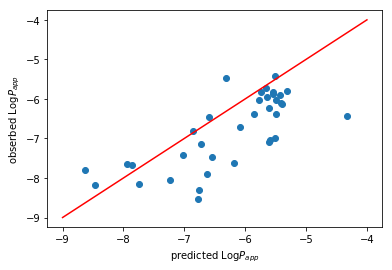

In [13]:
x = np.linspace(-9,-4)  
y = x              
plt.plot(x,y,color="r")      

y1 = pred
y2 = test_label
plt.scatter(y1,y2)

plt.ylabel('obserbed Log$P_{app}$')
plt.xlabel('predicted Log$P_{app}$')
plt.show()

In [14]:
r2

0.050519437222406705

In [15]:
r

0.7343365044397467

In [16]:
rmse

0.8767854918074355

In [ ]:
def prediction(x):
    tuned_parameters = [
    {'C': [2**(-3), 2**(-2), 2**(-1), 1, 2, 2**2, 2**3, 2**4, 2**5, 2**6, 2**7, 2**8, 2**9, 2**10], 'kernel': ['linear']},
    {'C': [2**(-3), 2**(-2), 2**(-1), 1, 2, 2**2, 2**3, 2**4, 2**5, 2**6, 2**7, 2**8, 2**9, 2**10], 'kernel': ['rbf'], 'gamma': [2**(-10), 2**(-9), 2**(-8), 2**(-7), 2**(-6), 2**(-5), 2**(-4), 2**(-3), 2**(-2), 2**(-1), 1 ]},
    ]
    
    path = 'New Folder/全体_部分_part2.csv'
    
    with open(path,mode='a') as f:
        data = np.loadtxt("全体FURUKAWA_最後_名前なし.csv",delimiter=",",dtype=float)
        feature = data[:,0:x]
        label = data[:,-1]

        scaler = StandardScaler()
        scaler.fit(feature)
        feature = scaler.transform(feature)

        kf = KFold(n_splits = 5, shuffle = True)
        count = 0
        for train_index, test_index in kf.split(feature):
            train_feature, train_label, test_feature, test_label = np.array(feature)[train_index], np.array(label)[train_index], np.array(feature)[test_index], np.array(label)[test_index]

            grid = GridSearchCV(SVR(),tuned_parameters,cv=5,scoring='r2')
            grid.fit(train_feature,train_label)

            clf = SVR(C=grid.best_params_['C'],kernel='rbf',gamma=grid.best_params_['gamma'],epsilon=0.1)
            clf.fit(train_feature, train_label)
            pred = clf.predict(test_feature)

            if(count==4):
                f.write(str(r2_score(test_label,pred)))
            else:
                f.write(str(r2_score(test_label,pred)))
                f.write(",")
            count += 1
        f.write("\n")
    return 

In [ ]:
ind=np.array(range(0,40))

for i in range(len(ind)):
    prediction(ind[i])

In [21]:
data=np.loadtxt("New Folder/全体_部分_part2.csv",delimiter=",",dtype=float)
max_fe=np.zeros(9)


for i in range(9):
    max_fe[i] = max(data[i])

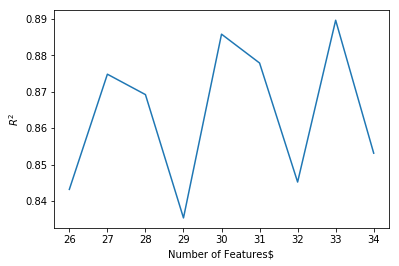

In [22]:
pdf = PdfPages('New Folder/separate_一部_一部.pdf')
plt.figure()
plt.plot(ind,max_fe)
plt.xlabel('Number of Features$')
plt.ylabel('$R^2$')
plt.plot()
pdf.savefig()

pdf.close()

In [23]:
train_data=np.loadtxt("全体FURUKAWA_最後_名前なし.csv",delimiter=",",dtype=float)
train_feature=train_data[:,0:33]
train_label=train_data[:,-1]

test_data=np.loadtxt("全体WANG_最後_名前なし.csv",delimiter=",",dtype=float)
test_feature=test_data[:,0:33]
test_label=test_data[:,-1]

std = StandardScaler()
std.fit(train_feature)
train_feature = std.transform(train_feature)
test_feature = std.transform(test_feature)

In [24]:
grid=GridSearchCV(SVR(),tuned_parameters,cv=5,scoring="r2")
grid.fit(train_feature,train_label)
print(grid.best_params_)

{'C': 64, 'gamma': 0.0078125, 'kernel': 'rbf'}


In [25]:
reg=SVR(C=grid.best_params_['C'],kernel="rbf",gamma=grid.best_params_['gamma'])
reg.fit(train_feature,train_label)
pred = reg.predict(test_feature)

In [26]:
r = r_calc(test_label,pred)
r2 = r2_score(test_label,pred)
rmse = (mean_squared_error(test_label,pred))**0.5

パラメータ: rbf, C 64.000000, gamma 0.007812
SVR: r2 0.029753, RMSE 0.886322, r 0.690639


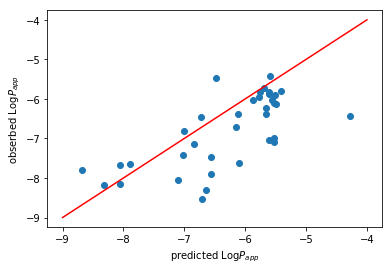

In [27]:
x = np.linspace(-9,-4)  
y = x              
plt.plot(x,y,color="r")      

y1 = pred
y2 = test_label
plt.scatter(y1,y2)

plt.ylabel('obserbed Log$P_{app}$')
plt.xlabel('predicted Log$P_{app}$')
plt.plot()

print("パラメータ: rbf, C %f, gamma %f"%(grid.best_params_['C'],grid.best_params_['gamma']))
print ("SVR: r2 %f, RMSE %f, r %f" % (r2, rmse, r))